# Stochastic Gradient Descent classifier

### Importing basic libraries

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np 
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import SGDClassifier

In [2]:
mnist = fetch_openml('mnist_784')

c:\Users\Rahat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print('scikit-learn version: {}.'.format(sklearn.__version__))

scikit-learn version: 1.3.2.


In [4]:
mnist.target = mnist.target.astype(np.int8)

c:\Users\Rahat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


In [5]:
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [7]:
print(np.sqrt(784))

28.0


In [8]:
y[426]

7

In [9]:
digit = X[426]
digit = digit.reshape(28, 28)
print(digit)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

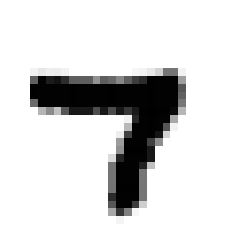

In [10]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.axis('off')
plt.show()

### Splitting the dataset

In [11]:
X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000]
y_test = y[60000:]

### Permutation Sensitivity

By shuffling the data, the model is exposed to different patterns in each epoch, which helps prevent it from overfitting to specific patterns in the training data. In other words, shuffling data helps the model to generalize better to new data.

In [12]:
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

### Binary Classification and SGD Classifier
#### Binary Classification
Binary Classification is a type of machine learning algorithm used to classify data into one of two categories. It predicts a binary outcome, where the result can either be positive or negative. For example, binary classification can be used to predict if a customer will buy a product or not, or if an email is spam or not.

##### Mathematical Formulas

$$
X = 
\begin{bmatrix}
  x_1 \\
  x_2 \\
  \vdots \\
  x_n \\
\end{bmatrix},
\quad
y = 
\begin{bmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_n \\
\end{bmatrix};
y_n \in \{0, 1\}

$$
$$
f(x) = w^TX + b \quad \text{where} \quad 
f(x) =
\begin{cases}
  +1,\quad \text{$f(x) > 0$}\\
  -1 \quad \text{else}
\end{cases}
$$
SGD minimize: 
$$
\epsilon (w, b) = \frac{1}{n}\sum_{i=1}^n L(y_i, f(x_i)) + \alpha R(w)
$$
where $L(y_i, f(x_i))$ is loss function, $R(w)$ is a regularization term which penalizes the model complexity and $\alpha is a certain hyper parameter$.

Loss Function:
1. Least Square: $[y_i - f(x_i)]^2$
2. Logistic Regression:
$$
\begin{cases}
  -\log(f(x_i)),\quad \text{if $y_i = 1$}\\
  -\log(1 - f(x_i)) \quad \text{else}
\end{cases}
$$
3. Hinge: $\max[0, 1 - y_if(x_i)]$

In [13]:
y_train_6 = y_train == 6
y_test_6 = y_train == 6

In [22]:
# sgd_classifier = SGDClassifier(max_iter=20, tol=-np.infty)
sgd_classifier = SGDClassifier(max_iter=1000, tol=0)
sgd_classifier.fit(X_train, y_train_6)

SGDClassifier(tol=0)

In [23]:
sgd_classifier.predict([X[32]])

array([ True])

In [24]:
y[32]

6

#### Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(sgd_classifier, X_train, y_train_6)

array([0.98083333, 0.97816667, 0.9825    , 0.97866667, 0.96158333])

In [27]:
cross_val_score(sgd_classifier, X_train, y_train_6, cv=4)

array([0.98353333, 0.98113333, 0.981     , 0.98253333])